In [1]:
# Importing Basic Libraries
# Basic Libraries
!pip install --upgrade category_encoders
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import category_encoders as ce

In [2]:
# Getting Datasets
pd.set_option("display.max_rows", 50)
cr = pd.read_csv("credit_record.csv")
ar = pd.read_csv("application_record.csv")

In [3]:
# Viewing credit record
print(cr)

              ID  MONTHS_BALANCE STATUS
0        5001711               0      X
1        5001711              -1      0
2        5001711              -2      0
3        5001711              -3      0
4        5001712               0      C
...          ...             ...    ...
1048570  5150487             -25      C
1048571  5150487             -26      C
1048572  5150487             -27      C
1048573  5150487             -28      C
1048574  5150487             -29      C

[1048575 rows x 3 columns]


In [4]:
# Getting info of credit record
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [5]:
# Viewing application record
print(ar)

             ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008805           M            Y               Y             0   
2       5008806           M            Y               Y             0   
3       5008808           F            N               Y             0   
4       5008809           F            N               Y             0   
...         ...         ...          ...             ...           ...   
438552  6840104           M            N               Y             0   
438553  6840222           F            N               N             0   
438554  6841878           F            N               N             0   
438555  6842765           F            N               Y             0   
438556  6842885           F            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0      

In [6]:
# Getting info of application record
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

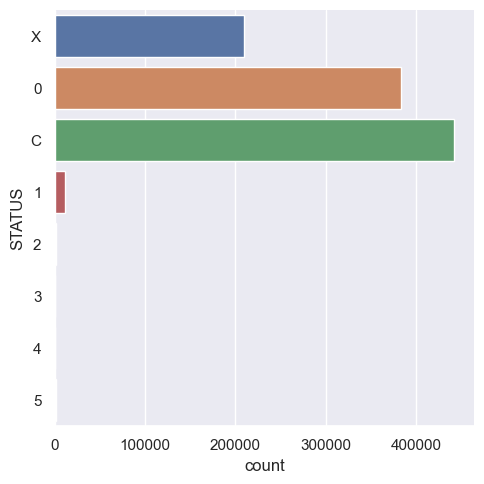

In [7]:
# Variables under STAtUS in cr
sb.catplot(y="STATUS",data= cr,kind="count")

In [8]:
# Replacing the values in STATUS in cr
cr['STATUS'].replace(['0'], 1 ,inplace= True)
cr['STATUS'].replace(['1'], 1,inplace= True)
cr['STATUS'].replace(['2'], 1 ,inplace= True)
cr['STATUS'].replace(['3'], 1,inplace= True)
cr['STATUS'].replace(['4'], 1 ,inplace= True)
cr['STATUS'].replace(['5'], 1,inplace= True)
cr['STATUS'].replace(['C'], 0,inplace= True)
cr['STATUS'].replace(['X'], 0,inplace= True)

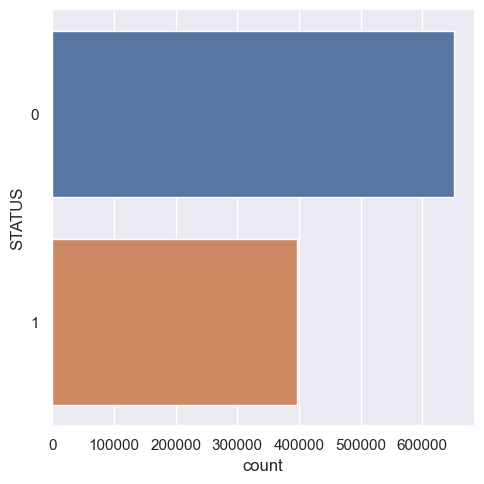

In [9]:
# Variables under STAtUS in cr updated
sb.catplot(y="STATUS",data= cr,kind="count")
plt.show()

In [10]:
# Filling the NULL valus in Occupation Type in ar
ar['OCCUPATION_TYPE'].fillna(value="NA", inplace= True)

In [11]:
cr = cr.groupby(['ID'])['STATUS'].agg('mean')

In [12]:
cr.info()

<class 'pandas.core.series.Series'>
Int64Index: 45985 entries, 5001711 to 5150487
Series name: STATUS
Non-Null Count  Dtype  
--------------  -----  
45985 non-null  float64
dtypes: float64(1)
memory usage: 718.5 KB


In [13]:
# merging the 2 dataframes and removing all different IDs
merged_df = pd.merge(cr, ar, on="ID", how="inner")
# Rounding up STATUS to whole nummber
merged_df["STATUS"] = np.ceil(merged_df["STATUS"])
# Rounding up STATUS to one Decimal Place
#merged_df['STATUS'] = merged_df['STATUS'].round(decimals = 1)
print(merged_df)

            ID  STATUS CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0      5008804     1.0           M            Y               Y             0   
1      5008805     1.0           M            Y               Y             0   
2      5008806     1.0           M            Y               Y             0   
3      5008808     1.0           F            N               Y             0   
4      5008809     0.0           F            N               Y             0   
...        ...     ...         ...          ...             ...           ...   
36452  5150482     1.0           F            Y               Y             1   
36453  5150483     0.0           F            Y               Y             1   
36454  5150484     1.0           F            Y               Y             1   
36455  5150485     1.0           F            Y               Y             1   
36456  5150487     0.0           M            Y               N             0   

       AMT_INCOME_TOTAL    

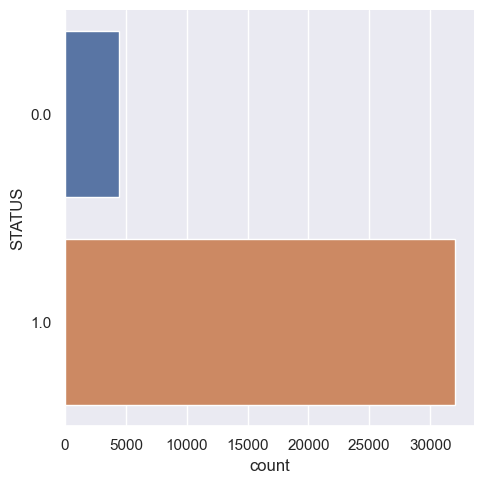

In [14]:
# Seeing the distrubution of data for STATUS
sb.catplot(y="STATUS",data= merged_df,kind="count")
plt.show()

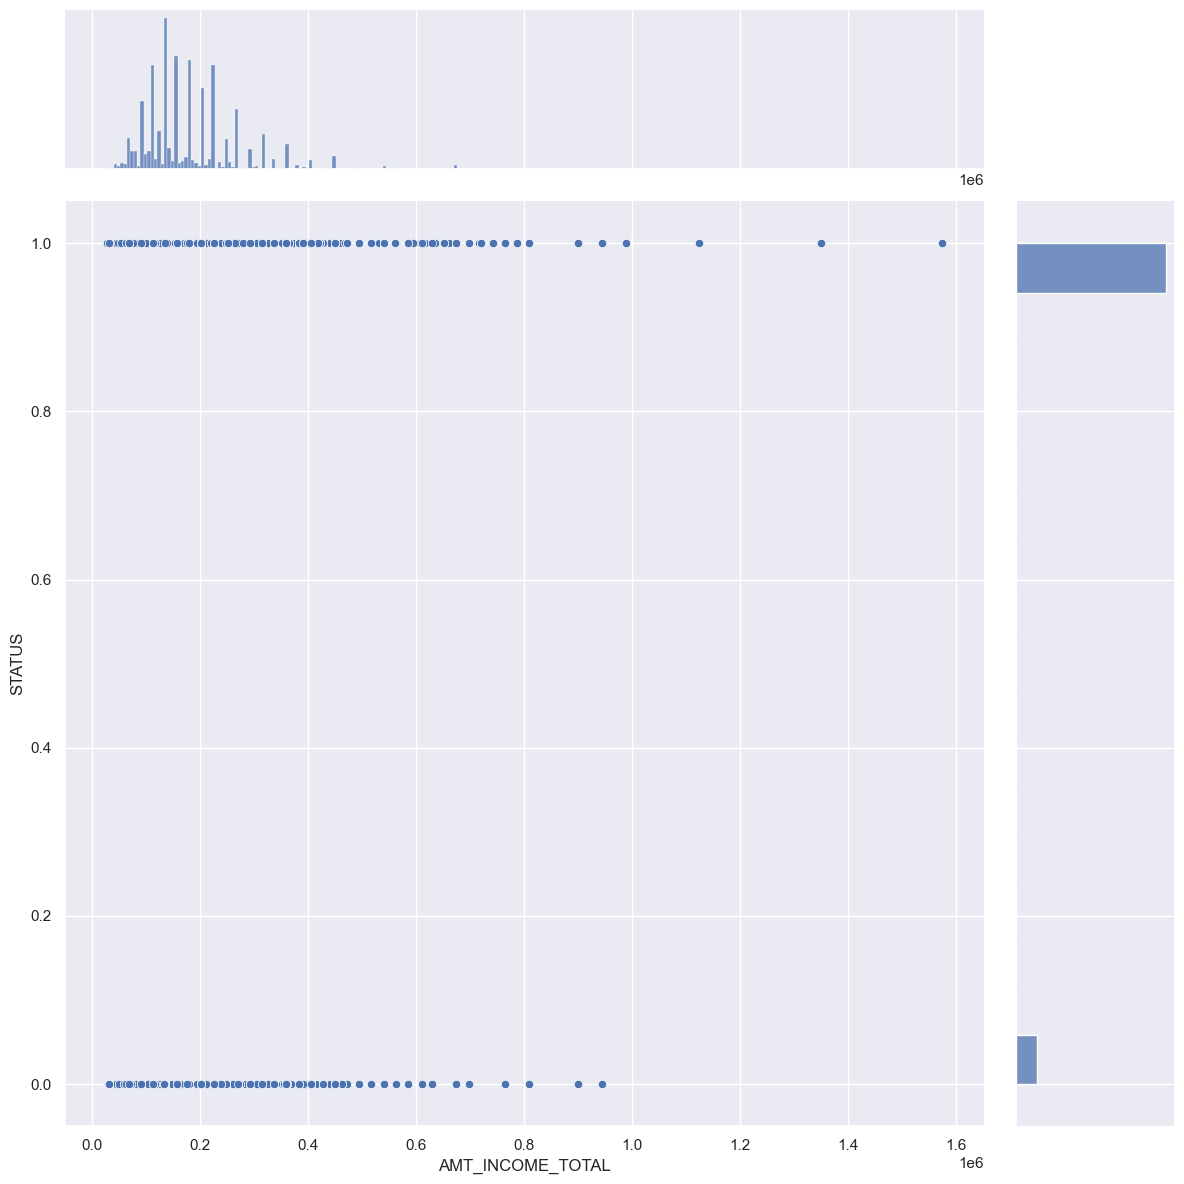

In [15]:
# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = merged_df, y = "STATUS", x = "AMT_INCOME_TOTAL", height = 12)
plt.show()

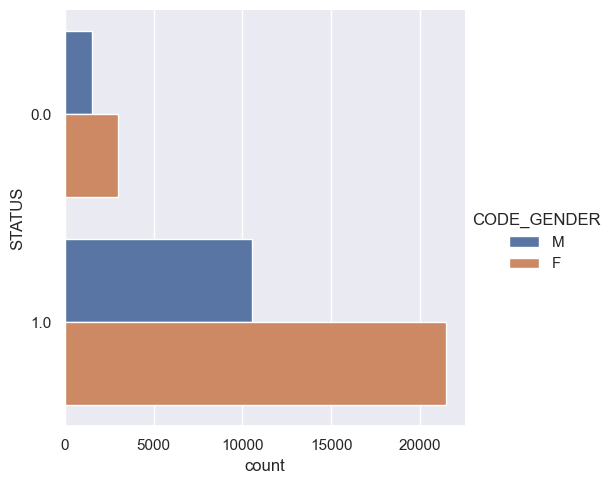

In [16]:
# Variables under STAtUS in cr updated
sb.catplot(y="STATUS",data= merged_df,kind="count",hue="CODE_GENDER")
plt.show()

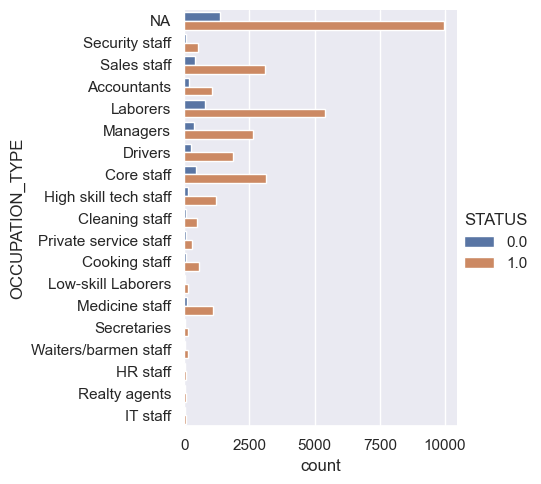

In [17]:
# Variables under STAtUS in cr updated
sb.catplot(y="OCCUPATION_TYPE",data= merged_df,kind="count",hue="STATUS")
plt.show()

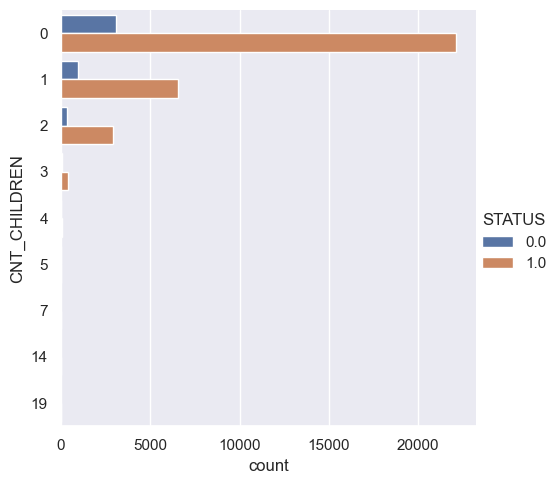

In [18]:
# Variables under STAtUS in cr updated
sb.catplot(y="CNT_CHILDREN",data= merged_df,kind="count",hue="STATUS")
plt.show()

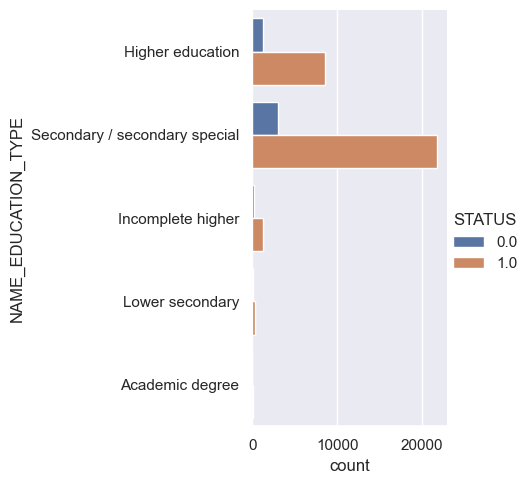

In [19]:
# Variables under STAtUS in cr updated
sb.catplot(y="NAME_EDUCATION_TYPE",data= merged_df,kind="count",hue="STATUS")
plt.show()

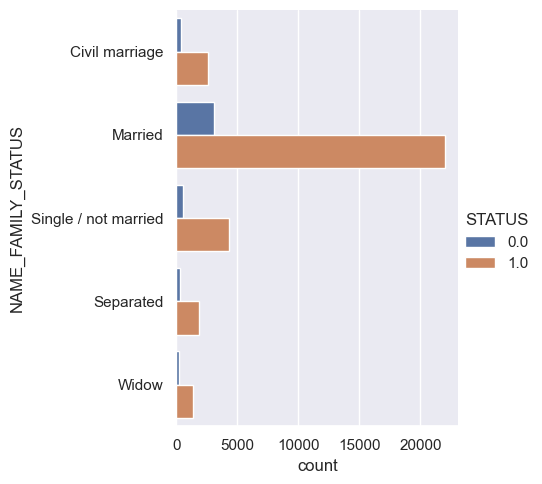

In [20]:
# Variables under STAtUS in cr updated
sb.catplot(y="NAME_FAMILY_STATUS",data= merged_df,kind="count",hue="STATUS")
plt.show()

In [21]:
#for col in merged_df.columns:
 #   if merged_df[col].dtype == 'object':
  #      merged_df[col] = le.fit_transform(merged_df[col])

In [22]:

# SHow cleaning steps taken message
print("\n[CONVERSIONS MADE]")

# Drop the "Booking_ID" column
#merged_df.drop("ID", axis=1, inplace=True)
print("- Dropped ID column")

# Use target encoder to encode the non-numerical columns
# Define the target encoder with smoothing to avoid overfitting
encoder = ce.TargetEncoder(cols=["NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY"], smoothing=0.2)
print("- Converted non-numerical columns to numerical columns using target encoder with smoothing")

# Fit and transform the encoder on the data
merged_df = encoder.fit_transform(merged_df, merged_df["STATUS"])

# Show number of numerical and non-numerical columns in the dataframe
print("\n[POST CONVERSION]\n Number of numerical columns: {}".format(merged_df.select_dtypes(include=np.number).shape[1]))
print("\n[POST CONVERSION]\n Number of non-numerical columns: {}".format(merged_df.select_dtypes(exclude=np.number).shape[1]))


[CONVERSIONS MADE]
- Dropped ID column
- Converted non-numerical columns to numerical columns using target encoder with smoothing

[POST CONVERSION]
 Number of numerical columns: 19

[POST CONVERSION]
 Number of non-numerical columns: 0


In [23]:
# Show the number of unique values in each column
print("[UNIQUE VALUES PER COLUMN]\n")
merged_df.nunique()

[UNIQUE VALUES PER COLUMN]



ID                     36457
STATUS                     2
CODE_GENDER                2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CNT_CHILDREN               9
AMT_INCOME_TOTAL         265
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
NAME_HOUSING_TYPE          6
DAYS_BIRTH              7183
DAYS_EMPLOYED           3640
FLAG_MOBIL                 1
FLAG_WORK_PHONE            2
FLAG_PHONE                 2
FLAG_EMAIL                 2
OCCUPATION_TYPE           19
CNT_FAM_MEMBERS           10
dtype: int64

In [24]:
merged_df.isna().sum()

ID                     0
STATUS                 0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [25]:
store = ['AMT_INCOME_TOTAL','CNT_FAM_MEMBERS','NAME_EDUCATION_TYPE']

X = pd.DataFrame(merged_df[store]) 
y = pd.DataFrame(merged_df['STATUS']) 

In [26]:
from sklearn.model_selection import KFold,StratifiedKFold,train_test_split
kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=0)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(max_depth=12,splitter='best',random_state=42)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, random_state=42)

In [29]:
y_pred = dectree.predict(X_test)
y_pred_train= dectree.predict(X_train)

In [30]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8802331561803531



In [31]:
# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train,y_pred_train)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_pred_train), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

TPR Train :	 0.9980466460913389
TNR Train :	 0.03503363228699551

FPR Train :	 0.9649663677130045
FNR Train :	 0.001953353908661171


<AxesSubplot:>

In [32]:
# Import the required metric from sklearn


# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8771256171146462

TPR Test :	 0.9959406713505075
TNR Test :	 0.019165727170236752

FPR Test :	 0.9808342728297632
FNR Test :	 0.004059328649492584


<AxesSubplot:>

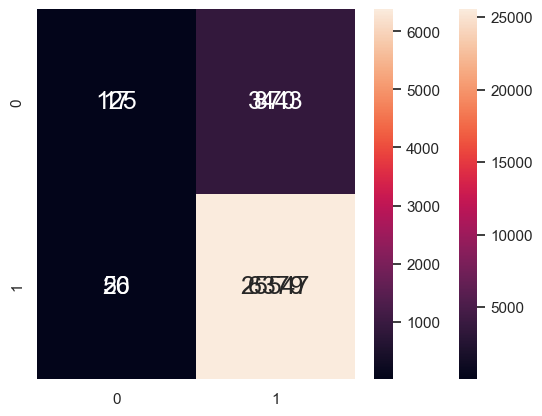

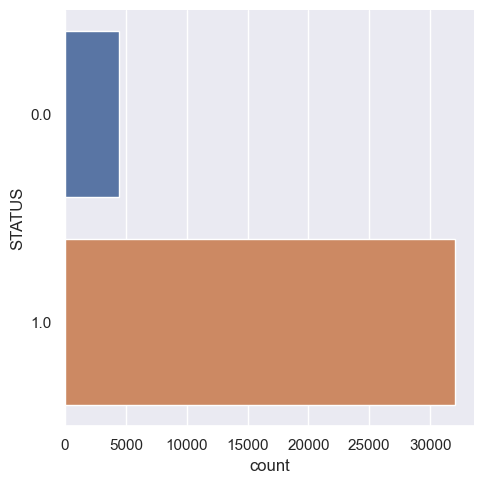

In [33]:
sb.catplot(y = 'STATUS', data = merged_df, kind = "count")
plt.show()

In [34]:
# Upsample Bad to match Good
from sklearn.utils import resample

creditBad = merged_df[merged_df.STATUS == 1]
creditGood = merged_df[merged_df.STATUS == 0]
 
# Upsample the good samples
creditgood_up = resample(creditGood, 
                        replace=True,                     # sample with replacement
                        n_samples=creditBad.shape[0])    # to match number of Bad
 
# Combine the two classes back after upsampling
merged_df = pd.concat([creditBad, creditgood_up])
 
# Check the ratio of the classes
merged_df['STATUS'].value_counts()

1.0    32002
0.0    32002
Name: STATUS, dtype: int64

In [35]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64004 entries, 0 to 12871
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   64004 non-null  int64  
 1   STATUS               64004 non-null  float64
 2   CODE_GENDER          64004 non-null  float64
 3   FLAG_OWN_CAR         64004 non-null  float64
 4   FLAG_OWN_REALTY      64004 non-null  float64
 5   CNT_CHILDREN         64004 non-null  int64  
 6   AMT_INCOME_TOTAL     64004 non-null  float64
 7   NAME_INCOME_TYPE     64004 non-null  float64
 8   NAME_EDUCATION_TYPE  64004 non-null  float64
 9   NAME_FAMILY_STATUS   64004 non-null  float64
 10  NAME_HOUSING_TYPE    64004 non-null  float64
 11  DAYS_BIRTH           64004 non-null  int64  
 12  DAYS_EMPLOYED        64004 non-null  int64  
 13  FLAG_MOBIL           64004 non-null  int64  
 14  FLAG_WORK_PHONE      64004 non-null  int64  
 15  FLAG_PHONE           64004 non-null 

In [36]:
# Extract Response and Predictors
store = ['AMT_INCOME_TOTAL','CNT_FAM_MEMBERS','NAME_EDUCATION_TYPE']

X = pd.DataFrame(merged_df[store]) 
y = pd.DataFrame(merged_df['STATUS']) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 8)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=['0','1'])

[Text(0.6017361111111111, 0.9444444444444444, 'AMT_INCOME_TOTAL <= 255825.0\ngini = 0.5\nsamples = 44802\nvalue = [22281, 22521]\nclass = 1'),
 Text(0.3765625, 0.8333333333333334, 'AMT_INCOME_TOTAL <= 248625.0\ngini = 0.5\nsamples = 36325\nvalue = [17728, 18597]\nclass = 1'),
 Text(0.27534722222222224, 0.7222222222222222, 'NAME_EDUCATION_TYPE <= 0.886\ngini = 0.5\nsamples = 36215\nvalue = [17706, 18509]\nclass = 1'),
 Text(0.17222222222222222, 0.6111111111111112, 'AMT_INCOME_TOTAL <= 203625.0\ngini = 0.5\nsamples = 34592\nvalue = [17012, 17580]\nclass = 1'),
 Text(0.08888888888888889, 0.5, 'AMT_INCOME_TOTAL <= 115695.0\ngini = 0.5\nsamples = 29384\nvalue = [14613, 14771]\nclass = 1'),
 Text(0.044444444444444446, 0.3888888888888889, 'CNT_FAM_MEMBERS <= 4.5\ngini = 0.499\nsamples = 9888\nvalue = [4681, 5207]\nclass = 1'),
 Text(0.022222222222222223, 0.2777777777777778, 'CNT_FAM_MEMBERS <= 2.5\ngini = 0.498\nsamples = 9700\nvalue = [4550, 5150]\nclass = 1'),
 Text(0.011111111111111112, 0.

In [37]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Train Data
Accuracy  :	 0.5542386500602652

TPR Train :	 0.4709826384263576
TNR Train :	 0.6383914546025762

FPR Train :	 0.3616085453974238
FNR Train :	 0.5290173615736424


<AxesSubplot:>

In [38]:

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.5512967399229247

TPR Test :	 0.45965615441409136
TNR Test :	 0.6406748276926242

FPR Test :	 0.35932517230737576
FNR Test :	 0.5403438455859086


<AxesSubplot:>

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 15)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.STATUS.ravel())

RandomForestClassifier(max_depth=15)

In [47]:

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Train Data
Accuracy  :	 0.6094370787018437

TPR Train :	 0.6601429848078642
TNR Train :	 0.5588261528855588

FPR Train :	 0.4411738471144412
FNR Train :	 0.33985701519213585


<AxesSubplot:>

In [48]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.6010832204978648

TPR Test :	 0.6544377468301809
TNR Test :	 0.5474947807933194

FPR Test :	 0.4525052192066806
FNR Test :	 0.34556225316981914


<AxesSubplot:>

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [52]:
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,501,100
                                       ),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(14, 25)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'balanced_accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.STATUS.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]),
                         'n_estimators': array([100, 200, 300, 400, 500])},
             scoring='balanced_accuracy')

In [53]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=21, n_estimators=500)
0.5983409389822494


In [62]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 500,   # found using GridSearchCV
                                 max_depth = 21)       # found using GridSearchCV

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.STATUS.ravel())

RandomForestClassifier(max_depth=21, n_estimators=500)

In [63]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Train Data
Accuracy  :	 0.6098165260479443

TPR Train :	 0.6352920164315057
TNR Train :	 0.5843524056056414

FPR Train :	 0.41564759439435867
FNR Train :	 0.3647079835684944


<AxesSubplot:>

In [64]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.6021247786688887

TPR Test :	 0.623776806162815
TNR Test :	 0.5804501875781576

FPR Test :	 0.4195498124218424
FNR Test :	 0.3762231938371851


<AxesSubplot:>